<a href="https://colab.research.google.com/github/AngelGuadarrama/Forest-Fires/blob/main/forest_fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import csv
from os import listdir
import re
from ipywidgets import interact, interact_manual
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Ejercicio 1

El objetivo es generar un programa, una base de datos o tabular, que le permita encontrar clientes para alianzas potenciales.

a) Descarga

b) Numeración consecutiva (Michoacán no)

c) Función para agregar Ruta_Origen

d) compendio_total.txt (con |) (carpeta de lectura y escritura)

e) Mensaje con tamaño, nombre de columnas y columnas faltantes

f) Filtrar por telefono/correo, compendio_total_contactable.txt

g) Quitar acentos, multiespacios y usar Capital()

In [ ]:
#b)
csv_files=['/content/drive/MyDrive/Colab Notebooks/Examen/'+file 
           for file in listdir('/content/drive/MyDrive/Colab Notebooks/Examen/')
           if (file[-3:] == 'csv') and (file[:5] == 'denue') and (file[-7:-5] != '16')]

for csv_file in csv_files:
  data=pd.read_csv(csv_file, encoding = "ISO-8859-1")
  data['Prueba']= [i for i in range(1,data.shape[0]+1)] #Numeración Consecutiva
  data.to_csv(csv_file, index=False, encoding = "ISO-8859-1")
  print('Columna Prueba agregada a: '+csv_file)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Columna Prueba agregada a: /content/drive/MyDrive/Colab Notebooks/Examen/denue_inegi_09_.csv
Columna Prueba agregada a: /content/drive/MyDrive/Colab Notebooks/Examen/denue_inegi_13_.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Columna Prueba agregada a: /content/drive/MyDrive/Colab Notebooks/Examen/denue_inegi_15_1.csv
Columna Prueba agregada a: /content/drive/MyDrive/Colab Notebooks/Examen/denue_inegi_15_2.csv
Columna Prueba agregada a: /content/drive/MyDrive/Colab Notebooks/Examen/denue_inegi_17_.csv
Columna Prueba agregada a: /content/drive/MyDrive/Colab Notebooks/Examen/denue_inegi_21_.csv


In [ ]:
#c), d) e)
@interact_manual
def compendio_total(dir_int='/content/drive/MyDrive/Colab Notebooks/Examen/', dir_out='/content/drive/MyDrive/Colab Notebooks/Examen/'):
  global columnas_compendio
  
  csv_files=[file for file in listdir(dir_int) if file[-3:] == 'csv' and file[:5] == 'denue']
  #csv_files=["denue_inegi_16_.csv","denue_inegi_17_.csv","denue_inegi_13_.csv"]

  with open(dir_out+'compendio_total.txt', "w") as my_output_file: #Archivo txt
    columnas_compendio=[]

    for csv_file in csv_files: 
        print('Cargando archivo: '+csv_file)
        i=0 #Numero de filas

        with open(dir_int+csv_file, "r", encoding = "ISO-8859-1") as my_input_file: #Abre un archivo csv

            for row in csv.reader(my_input_file):

                if  i==0: #Encabezado
                   row.append('Ruta_Origen')
                   columnas=row
                   print('  Columnas: ', columnas)

                   if csv_files.index(csv_file) == 0: #Si es el primer archivo se agregan las columnas
                     columnas_compendio=columnas
                   else:
                     column_extra=list(set(columnas).difference(set(columnas_compendio)))
                     column_faltante=list(set(columnas_compendio).difference(set(columnas)))
                     #print('')
                     print('Este archivo no contiene la(s) columna(s): ', column_extra)
                     print('Este archivo contiene ademas la(s) columna(s): ', column_faltante)
                     columnas_compendio+= column_extra

                   my_output_file.write("|".join(row)+'\n') #Separador y salto de linea

                else:
                   row.append(csv_file) #Ruta_Origen
                   if i==1: print('  Primera Fila: ',row)

                   my_output_file.write("|".join(row)+'\n') #Separador y salto de linea
      
                i+=1  

        print('  Total de filas: '+str(i)) 
        print('  Total de columnas: '+str(len(row)))  
        print('')
        print('')
    my_output_file.close()



  print('  Se ha creado el archivo compendio_total.txt exitosamente!')
  

interactive(children=(Text(value='/content/drive/MyDrive/Colab Notebooks/Examen/', description='dir_int'), Tex…

In [ ]:
#f)
with open('/content/drive/MyDrive/Colab Notebooks/Examen/compendio_total_contactable.txt', "w") as file_txt_contact:
    with open('/content/drive/MyDrive/Colab Notebooks/Examen/compendio_total.txt', "r") as file_txt:
        lines= file_txt.readlines()

        for line in lines:
            if line[:2] == 'id': 
                print('Columnas: ',line)
            else:
                row=line.split(sep="|")
                telefono= len( re.findall(r"\d{10}", row[columnas_compendio.index('telefono')]) ) != 0
                correo= len( re.findall(r"@", row[columnas_compendio.index('correoelec')]) ) != 0
                if telefono or correo:
                    file_txt_contact.write("|".join(row)) #Separador

        print('Se ha creado el archivo compendio_total_contactable.txt exitosamente!')

    

Columnas:  id|nom_estab|raz_social|codigo_act|nombre_act|per_ocu|tipo_vial|nom_vial|tipo_v_e_1|nom_v_e_1|tipo_v_e_2|nom_v_e_2|tipo_v_e_3|nom_v_e_3|numero_ext|letra_ext|edificio|edificio_e|numero_int|letra_int|tipo_asent|nomb_asent|tipoCenCom|nom_CenCom|num_local|cod_postal|cve_ent|entidad|cve_mun|municipio|cve_loc|localidad|ageb|manzana|telefono|correoelec|www|tipoUniEco|latitud|longitud|fecha_alta|Ruta_Origen

Columnas:  id|nom_estab|raz_social|codigo_act|nombre_act|per_ocu|tipo_vial|nom_vial|tipo_v_e_1|nom_v_e_1|tipo_v_e_2|nom_v_e_2|tipo_v_e_3|nom_v_e_3|numero_ext|letra_ext|edificio|edificio_e|numero_int|letra_int|tipo_asent|nomb_asent|tipoCenCom|nom_CenCom|num_local|cod_postal|cve_ent|entidad|cve_mun|municipio|cve_loc|localidad|ageb|manzana|telefono|correoelec|www|tipoUniEco|latitud|longitud|fecha_alta|Prueba|Ruta_Origen

Columnas:  id|nom_estab|raz_social|codigo_act|nombre_act|per_ocu|tipo_vial|nom_vial|tipo_v_e_1|nom_v_e_1|tipo_v_e_2|nom_v_e_2|tipo_v_e_3|nom_v_e_3|numero_ext|letra

In [ ]:
def capital(texto):
  words=texto.split(sep=' ')
  texto_cap=[word.capitalize() for word in words]
  resultado= " ".join(texto_cap)
  return resultado


def acentos(texto=""):
  words=texto.split(sep=' ')
  words=[re.sub(r"á", "a", word) for word in words]
  words=[re.sub(r"é", "e", word) for word in words]
  words=[re.sub(r"í", "i", word) for word in words]
  words=[re.sub(r"ó", "o", word) for word in words]
  words=[re.sub(r"ú", "u", word) for word in words]

  words=[re.sub(r"Á", "A", word) for word in words]
  words=[re.sub(r"É", "E", word) for word in words]
  words=[re.sub(r"Í", "I", word) for word in words]
  words=[re.sub(r"Ó", "O", word) for word in words]
  words=[re.sub(r"Ú", "U", word) for word in words]
  resultado= " ".join(words)
  
  return resultado



In [ ]:
#g)
with open('/content/drive/MyDrive/Colab Notebooks/Examen/compendio_total_contactable1.txt', "w") as file_txt_contact1:
    with open('/content/drive/MyDrive/Colab Notebooks/Examen/compendio_total_contactable.txt', "r") as file_txt1:
        lines= file_txt1.readlines()
        
        for line in lines:
            row=line.split(sep="|")
            row=[ acentos(capital(re.sub(r"\s+", " ",col))) for col in row]
            file_txt_contact1.write("|".join(row)+'\n') #Separador

        print('Se ha limpiado el archivo compendio_total_contactable.txt exitosamente!')

Se ha limpiado el archivo compendio_total_contactable.txt exitosamente!


# Ejercicio 2

El objetivo es hacer un análisis de la base de datos contactable, para enunciar al área de negocio los giros principales por entidad federativa.

a)	Hacer un descriptivo crudo de todos los registros que contenga la palabra BANCO

El descriptivo debe enunciar al menos nombre de actividad y personal ocupado.
¿Qué otras variables puedes ser reelevantes?

Otras variables relevantes podrian ser raz_soc, tipo_vial y la entidad

Entragables: 

*	Un word/ppt para el área de negocio con la descripción de que giros de bancos 
(se evalua apoyo gráfico y redacción para negocio) solo aquellos que tienen BANCO

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Examen/compendio_total_contactable1.txt', "r") as file_clean:
    lines= file_clean.readlines()
    j=1
    actividades=[]
    establecimientos=[]
    for line in lines:
        row=line.split(sep="|")
        banco= len( re.findall(r"Banco", row[columnas_compendio.index('nom_estab')]) ) != 0
        if banco:
          print(j)
          print('Nombre:', row[columnas_compendio.index('nom_estab')])
          print('Actividad: ', row[columnas_compendio.index('nombre_act')])
          print('Ocupacion: ', row[columnas_compendio.index('per_ocu')])
          print('')
          j+=1

          actividades.append(row[columnas_compendio.index('nombre_act')])
          establecimientos.append(row[columnas_compendio.index('nom_estab')])
        

1
Nombre: Banco Barrera
Actividad:  Mineria De Arena Y Grava Para La Construccion
Ocupacion:  6 A 10 Personas

2
Nombre: Banco De Arena De Atecucario
Actividad:  Mineria De Arena Y Grava Para La Construccion
Ocupacion:  11 A 30 Personas

3
Nombre: Banco De Arena Diamante
Actividad:  Mineria De Arena Y Grava Para La Construccion
Ocupacion:  0 A 5 Personas

4
Nombre: Banco De Arena El Cerrito
Actividad:  Mineria De Arena Y Grava Para La Construccion
Ocupacion:  0 A 5 Personas

5
Nombre: Banco De Arena El Cerro De Las Yerbas
Actividad:  Mineria De Arena Y Grava Para La Construccion
Ocupacion:  0 A 5 Personas

6
Nombre: Banco De Arena El Granzon
Actividad:  Mineria De Arena Y Grava Para La Construccion
Ocupacion:  0 A 5 Personas

7
Nombre: Banco De Arena El Guayabal
Actividad:  Mineria De Arena Y Grava Para La Construccion
Ocupacion:  0 A 5 Personas

8
Nombre: Banco De Arena Joyitas
Actividad:  Mineria De Arena Y Grava Para La Construccion
Ocupacion:  6 A 10 Personas

9
Nombre: Banco De Ar

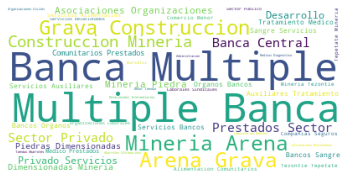

In [ ]:
actividades_unicas = []
[actividades_unicas.append(x) for x in actividades if x not in actividades_unicas]

stop_words_sp = set(stopwords.words('spanish'))

cloud=WordCloud(background_color='white', stopwords= stop_words_sp, random_state=2).generate(' '.join(actividades))
plt.imshow(cloud)
plt.axis('off')
plt.show()


In [ ]:
print('Numero de Actividades unicas: ', len(actividades_unicas))
actividades_unicas

Numero de Actividades unicas:  45


['Mineria De Arena Y Grava Para La Construccion',
 'Mineria De Otras Piedras Dimensionadas',
 'Mineria De Tezontle Y Tepetate',
 'Comercio Al Por Mayor De Cemento, Tabique Y Grava',
 'Banca Multiple',
 'Banca De Desarrollo',
 'Compañias De Seguros',
 'Servicios De Emergencia Comunitarios Prestados Por El Sector Publico',
 'Servicios De Alimentacion Comunitarios Prestados Por El Sector Privado',
 'Servicios De Bancos De Organos, Bancos De Sangre Y Otros Servicios Auxiliares Al Tratamiento Medico Prestados Por El Sector Privado',
 'Servicios De Alimentacion Comunitarios Prestados Por El Sector Publico',
 'Laboratorios Medicos Y De Diagnostico Del Sector Privado',
 'Restaurantes Con Servicio De Preparacion De Tacos Y Tortas',
 'Asociaciones Y Organizaciones Laborales Y Sindicales',
 'Otros Servicios De Reparacion Y Mantenimiento De Automoviles Y Camiones',
 'Comercio Al Por Menor En Tiendas De Abarrotes, Ultramarinos Y Miscelaneas',
 'Farmacias Sin Minisuper',
 'Bibliotecas Y Archivos Del

# Ejercicio 3

Suponiendo que no tuvieramos el apoyo del campo de nombre de actividad, sería importante observar que sí sabemos de nuestros datos, por su contenido:

a) Hacer una nube de bi-palabras y un Ngram (2 o 3) para entender que tipo de servicios se van a promover por estado (todos) usando solo el nombre del establecimiento

En el ejemplo no se ha hecho limpieza ¿Qué tipo de limpiezas se pueden hacer?  (ngram, count)

Aplicarlas. Apoyarse de cualquier tipo de visualización que se requiera.

Entragables: 
 
* Un bigrama (que muestre la coocurrencia de las top50 frases más comunes, una vez aplicada la limpieza correspondiente).

* Punto extra: usar algun apoyo gráfico para el apartado anterior:

In [ ]:
vect= CountVectorizer(max_features=50, 
                      stop_words=stop_words_sp, 
                      ngram_range=(2,3))

X=vect.fit_transform(pd.Series(establecimientos)) 
top_50_bi_tri_grams=pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

In [ ]:
top_50_bi_tri_grams.sum().sort_values(ascending=False)

banco inbursa                 330
banco compartamos             143
inbursa walmart                78
banco inbursa walmart          78
banco inbursa sanborns         61
inbursa sanborns               61
banco bajio                    37
banco inbursa sams             35
inbursa sams                   35
banco wal                      27
banco wal mart                 27
wal mart                       27
institucion banca              26
banca multiple                 26
institucion banca multiple     25
mart mexico                    25
mexico adelante                25
wal mart mexico                24
mart mexico adelante           24
banco inbursa plaza            20
inbursa plaza                  20
banco inbursa bodega           19
bodega aurrera                 19
inbursa bodega                 19
inbursa bodega aurrera         19
banco forjadores               17
banco mexico                   17
bbva bancomer                  15
compartamos banco              15
banco arena   

# Ejercicio 4

El objetivo es crear 2 nuevas variables:

* Hay o no incendio (si area > 0, hay incendio, eoc no)

* Magnitud del Incenido (usar el área en escala logarítmica si área > 0).

Se deben proponer 2 modelos, uno de clasificación y uno de regresión.
Al final habrá que comparar el modelo contra los datos reales para ver el poder predictivo.
No importa que se tenga el mejor modelo, lo que importa es entender que se está haciendo,
entender los pasos que se están siguiendo, asi como saber que modelos se conocen para dichos procesos.

Entragables: 
Explicar la metodologia que se uso para cada modelo

Requerimientos mínimos:  
Apoyo gráfico
una medida de desempeño, 
explicar por que se uso dicho modelo.

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Examen/forestfires.csv')
data.head(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
#Creamos nuestras nuevas columnas
data['incendio']=[value > 0 for value in data.area] 
data['magnitud']=np.log(data[data.area> 0]['area'])

Variables Numericas

In [ ]:
data[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain']].describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


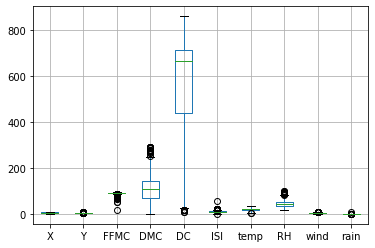

In [ ]:
data[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain']].boxplot()
plt.show()       

In [ ]:
data['DC_log']=np.log(data.DC) #Esta columna tiene una varianza muy alta
data.drop(['DC'], inplace=True, axis=1)

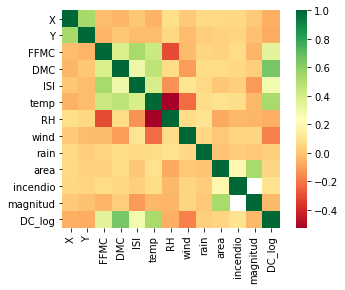

In [ ]:
#Quitaremos RH ya que tiene correlacion con la temperatura
sns.heatmap(data.corr(), square= True, cmap='RdYlGn') 
#data.drop(['RH'], inplace=True, axis=1)

Variables categoricas: aplicaremos dummys


In [ ]:
data.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [ ]:
data.day.value_counts() #Parece ser mas uniforme por lo que descartaremos esta variable
data.drop(['day'], inplace=True, axis=1)

In [ ]:
data.columns

Index(['X', 'Y', 'month', 'FFMC', 'DMC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'incendio', 'magnitud', 'DC_log'],
      dtype='object')

In [ ]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values


def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=2424, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values


def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

Modelo de Clasificación

En este caso elegí trabajar con un modelo de regresion logistica porque es un modelo simple que puede ser buena eleccion para empezar a experimentar. Las metrica que se utilizo fue AUC por su interpretabilidad conforme al azar y la clasica matriz de confusión. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

(465, 13) (465, 1)


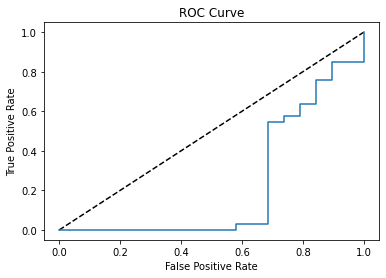

AUC: 0.22488038277511962
[[19  0]
 [33  0]]
(465, 13) (465, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

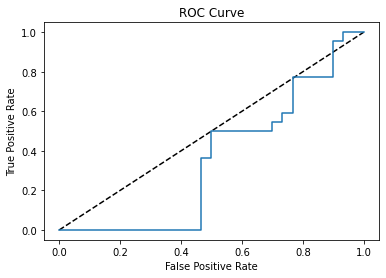

AUC: 0.3515151515151515
[[30  0]
 [22  0]]
(465, 13) (465, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

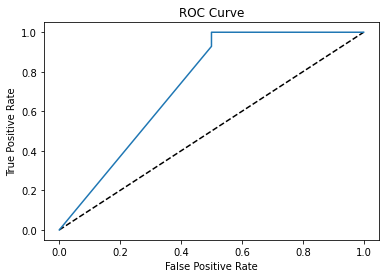

AUC: 0.7321428571428572
[[ 1 23]
 [ 0 28]]
(465, 13) (465, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

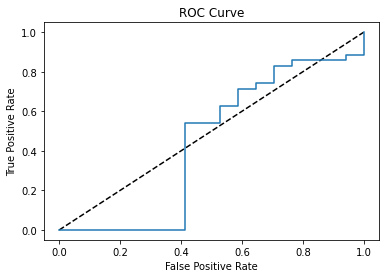

AUC: 0.43865546218487395
[[17  0]
 [35  0]]
(465, 13) (465, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

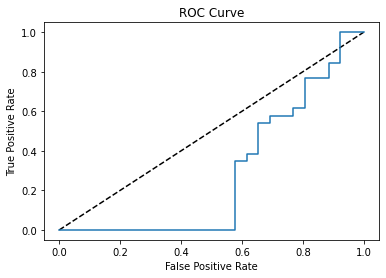

AUC: 0.2855029585798816
[[26  0]
 [26  0]]
(465, 13) (465, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

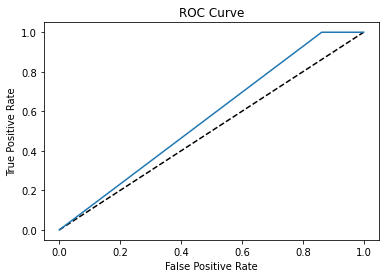

AUC: 0.5689655172413793
[[ 0 29]
 [ 0 23]]
(465, 13) (465, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


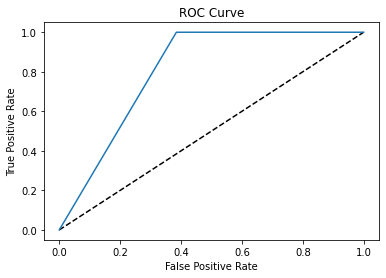

AUC: 0.8076923076923077
[[ 0 26]
 [ 0 26]]
(466, 13) (466, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

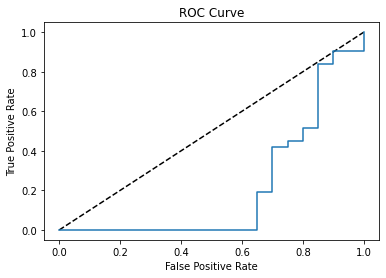

AUC: 0.21129032258064517
[[20  0]
 [31  0]]
(466, 13) (466, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

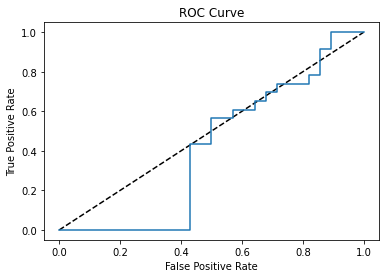

AUC: 0.4099378881987578
[[28  0]
 [23  0]]
(466, 13) (466, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

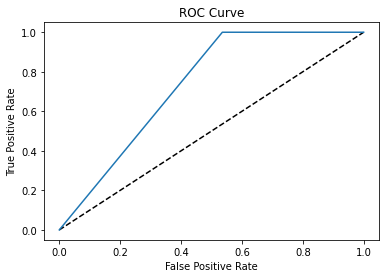

AUC: 0.7321428571428572
[[ 1 27]
 [ 0 23]]


In [ ]:
# Create n-fold cross-validation
kf = KFold(n_splits=10, random_state=123, shuffle=True)
roc_auc_score_list=[]

# For each folds split
for train_index, test_index in kf.split(data):
    cv_train, cv_test = data.iloc[train_index], data.iloc[test_index]

    cv_train['month_enc'], cv_test['month_enc'] = mean_target_encoding(train=cv_train,
                                                                           test=cv_test,
                                                                           target='incendio',
                                                                           categorical='month',
                                                                           alpha=5)

    #print(cv_train_dm.shape, cv_test_dm.shape)
    #print(cv_train.shape, cv_test.shape)

    #Estandarizamos las variables numericas
    ss1=StandardScaler()
    ss2=StandardScaler()
    ss3=StandardScaler()
    ss4=StandardScaler()
    ss5=StandardScaler()
    ss6=StandardScaler()
    ss7=StandardScaler()
    ss8=StandardScaler()
    ss9=StandardScaler()
    ss10=StandardScaler()

    ss1.fit(cv_train[['X']])
    ss2.fit(cv_train[['Y']])    
    ss3.fit(cv_train[['FFMC']])
    ss4.fit(cv_train[['DMC']])
    ss5.fit(cv_train[['DC_log']])
    ss6.fit(cv_train[['ISI']])
    ss7.fit(cv_train[['temp']])
    ss8.fit(cv_train[['RH']])
    ss9.fit(cv_train[['wind']])
    ss10.fit(cv_train[['rain']])

    cv_train_enc=pd.concat([pd.DataFrame(ss1.transform(cv_train[['X']]), columns=['X']), 
                           pd.DataFrame(ss2.transform(cv_train[['Y']]), columns=['Y']),
                           pd.DataFrame(ss3.transform(cv_train[['FFMC']]), columns=['FFMC']),
                           pd.DataFrame(ss4.transform(cv_train[['DMC']]), columns=['DMC']),
                           pd.DataFrame(ss5.transform(cv_train[['DC_log']]), columns=['DC_log']),
                           pd.DataFrame(ss6.transform(cv_train[['ISI']]), columns=['ISI']),
                           pd.DataFrame(ss7.transform(cv_train[['temp']]), columns=['temp']),
                           pd.DataFrame(ss8.transform(cv_train[['RH']]), columns=['RH']),
                           pd.DataFrame(ss9.transform(cv_train[['wind']]), columns=['wind']), 
                           pd.DataFrame(ss10.transform(cv_train[['rain']]), columns=['rain']) ], axis=1)
    
    cv_test_enc=pd.concat([pd.DataFrame(ss1.transform(cv_test[['X']]), columns=['X']), 
                           pd.DataFrame(ss2.transform(cv_test[['Y']]), columns=['Y']),
                           pd.DataFrame(ss3.transform(cv_test[['FFMC']]), columns=['FFMC']),
                           pd.DataFrame(ss4.transform(cv_test[['DMC']]), columns=['DMC']),
                           pd.DataFrame(ss5.transform(cv_test[['DC_log']]), columns=['DC_log']),
                           pd.DataFrame(ss6.transform(cv_test[['ISI']]), columns=['ISI']),
                           pd.DataFrame(ss7.transform(cv_test[['temp']]), columns=['temp']),
                           pd.DataFrame(ss8.transform(cv_test[['RH']]), columns=['RH']),
                           pd.DataFrame(ss9.transform(cv_test[['wind']]), columns=['wind']), 
                           pd.DataFrame(ss10.transform(cv_test[['rain']]), columns=['rain']) ], axis=1)
    

    #Training
    X_train, y_train= pd.concat([cv_train_enc.reset_index(), cv_train[['month_enc']].reset_index()], axis=1), cv_train[['incendio']]
    X_test, y_test= pd.concat([cv_test_enc.reset_index(), cv_test[['month_enc']].reset_index()], axis=1), cv_test[['incendio']]

    #print(X_train.shape, y_train.shape)
    plt.show()

    logreg= LogisticRegression()
    logreg.fit(X_train, y_train)
     
    y_pred= logreg.predict(X_test) 
    y_pred_proba= logreg.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    score=roc_auc_score(y_test, y_pred_proba)
    roc_auc_score_list.append(score) 
    print("AUC: {}".format(score))
    print(confusion_matrix(y_test, y_pred))

In [ ]:
print("Average_AUC: {}".format(np.mean(roc_auc_score_list)))

Average_AUC: 0.476272570505383


Modelo de Regresion

En este caso elegí trabajar con un modelo de regresion lineal porque es un modelo simple que puede ser buena eleccion para empezar a experimentar. Las metricas que se utilizaran son MAE por su facil interpretabilidad y RMSE para tomar en cuenta la variación del error.

In [ ]:
# Create n-fold cross-validation
kf = KFold(n_splits=50, random_state=24, shuffle=True)
MAE_list=[]
RMSE_list=[]

# For each folds split
for train_index, test_index in kf.split(data):
    cv_train, cv_test = data.iloc[train_index], data.iloc[test_index]
    cv_train_dm, cv_test_dm = data_dummy.iloc[train_index], data_dummy.iloc[test_index]

    #print(cv_train_dm.shape, cv_test_dm.shape)
    #print(cv_train.shape, cv_test.shape)

    #Estandarizamos las variables numericas
    ss1=StandardScaler()
    ss2=StandardScaler()
    ss3=StandardScaler()
    ss4=StandardScaler()
    ss5=StandardScaler()
    ss6=StandardScaler()
    ss7=StandardScaler()
    ss8=StandardScaler()
    ss9=StandardScaler()
    ss10=StandardScaler()

    ss1.fit(cv_train[['X']])
    ss2.fit(cv_train[['Y']])    
    ss3.fit(cv_train[['FFMC']])
    ss4.fit(cv_train[['DMC']])
    ss5.fit(cv_train[['DC_log']])
    ss6.fit(cv_train[['ISI']])
    ss7.fit(cv_train[['temp']])
    ss8.fit(cv_train[['RH']])
    ss9.fit(cv_train[['wind']])
    ss10.fit(cv_train[['rain']])

    cv_train_enc=pd.concat([pd.DataFrame(ss1.transform(cv_train[['X']]), columns=['X']), 
                           pd.DataFrame(ss2.transform(cv_train[['Y']]), columns=['Y']),
                           pd.DataFrame(ss3.transform(cv_train[['FFMC']]), columns=['FFMC']),
                           pd.DataFrame(ss4.transform(cv_train[['DMC']]), columns=['DMC']),
                           pd.DataFrame(ss5.transform(cv_train[['DC_log']]), columns=['DC_log']),
                           pd.DataFrame(ss6.transform(cv_train[['ISI']]), columns=['ISI']),
                           pd.DataFrame(ss7.transform(cv_train[['temp']]), columns=['temp']),
                           pd.DataFrame(ss8.transform(cv_train[['RH']]), columns=['RH']),
                           pd.DataFrame(ss9.transform(cv_train[['wind']]), columns=['wind']), 
                           pd.DataFrame(ss10.transform(cv_train[['rain']]), columns=['rain']) ], axis=1)
    
    cv_test_enc=pd.concat([pd.DataFrame(ss1.transform(cv_test[['X']]), columns=['X']), 
                           pd.DataFrame(ss2.transform(cv_test[['Y']]), columns=['Y']),
                           pd.DataFrame(ss3.transform(cv_test[['FFMC']]), columns=['FFMC']),
                           pd.DataFrame(ss4.transform(cv_test[['DMC']]), columns=['DMC']),
                           pd.DataFrame(ss5.transform(cv_test[['DC_log']]), columns=['DC_log']),
                           pd.DataFrame(ss6.transform(cv_test[['ISI']]), columns=['ISI']),
                           pd.DataFrame(ss7.transform(cv_test[['temp']]), columns=['temp']),
                           pd.DataFrame(ss8.transform(cv_test[['RH']]), columns=['RH']),
                           pd.DataFrame(ss9.transform(cv_test[['wind']]), columns=['wind']), 
                           pd.DataFrame(ss10.transform(cv_test[['rain']]), columns=['rain']) ], axis=1)
    

    #Training
    X_train, y_train= pd.concat([cv_train_enc.reset_index(), cv_train_dm.reset_index()], axis=1), cv_train[['magnitud']]
    X_test, y_test= pd.concat([cv_test_enc.reset_index(), cv_test_dm.reset_index()], axis=1), cv_test[['magnitud']]

    #print(X_train.shape, y_train.shape)

    lreg= LinearRegression()
    lreg.fit(X_train, y_train)
     
    y_pred= lreg.predict(X_test)
    
    MAE_list.append(mean_absolute_error(y_pred, y_test))
    RMSE_list.append(np.sqrt(mean_absolute_error(y_pred, y_test)))

In [ ]:
print("Average_MAE: {}".format(np.mean(MAE_list)))
print("Average_RMSE: {}".format(np.mean(RMSE_list)))

Average_RSS: 46.00972412450353
Average_RMSE: 6.471028506078829


En conclusión, ambos modelos no fueron buenos con las métricas estandares.
Queda por ver otros parametros, otro clasificador linear, conseguir más datos, técnicas enfocadas a pocos datos.
